In [1]:
from comp_features import generate_features
import pandas as pd
from train_model import train_kmeans, plot_market_regime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 你的 API Key
API_KEY = "ab746526067b62ac85bcf51ef80eae5a"

# 选择资产
ASSET = "SPX"

# 读取数据
# df = pd.read_excel(f"/Users/charlesxiong/Desktop/IBKR_algo/ode/data/{ASSET}/{ASSET}.xlsx")
df = pd.read_excel('/Users/charlesxiong/Desktop/IBKR_algo/ode/data/SPX/hist_data.xlsx')
# df = pd.read_excel('/Users/charlesxiong/Library/Containers/com.tencent.xinWeChat/Data/Library/Application Support/com.tencent.xinWeChat/2.0b4.0.9/2998da376bfc9a18a50b280a15262ed2/Message/MessageTemp/7d7949e6fbb30129561ad6cd1cf7a4b2/File/SPX(1).xlsx')
# df_news = pd.read_excel('/Users/charlesxiong/Desktop/IBKR_algo/ode/data/df_news.xlsx')
# df_news['News Sentiment_ewa_diff'] = df_news['News Sentiment_ewa'].diff(5)

# 计算所有特征
df_features = generate_features(df, ASSET, API_KEY)

df_bond = pd.read_excel('/Users/charlesxiong/Desktop/IBKR_algo/ode/data/BBG AGG BOND/BBG AGG BOND.xlsx')[['DateTime', 'BBG AGG BOND']]
df_features = pd.merge(df_features, df_bond, on='DateTime', how='left')


# news = ['News Sentiment_ewa_mean_ret_5d',
#  'News Sentiment_ewa_mean_ret_21d',
#        'News Sentiment_ewa_mean_ret_10d']

# news = ['News Sentiment_ewa_diff']


# 保存结果
# df_features = pd.merge(df_features, df_news[news+['DateTime']], on='DateTime', how='left')





In [3]:
df_features['Corr'] = df_features['SPX'].rolling(window=252, min_periods=150).corr(df_features['BBG AGG BOND'])
df_features['Market_Regime_Num_Train'] = 0


df_features

,DateTime,SPX,VIX,SPX_returns,SPX_mean_ret_5d,SPX_mean_ret_10d,SPX_mean_ret_21d,SPX_mean_ret_120d,SPX_downside_std_5d,SPX_downside_std_10d,...,SPX_sortino_5d,SPX_sortino_10d,SPX_sortino_21d,SPX_sortino_120d,T10Y2Y_EWMA_10,DGS2_diff_EWMA_21,VIX_EWMA_63,BBG AGG BOND,Corr,Market_Regime_Num_Train
0,1990-02-28,331.89,21.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.102264,0.001311,21.990000,393.75,NaN,0
1,1990-03-01,332.74,21.90,0.002558,0.002558,0.002558,0.002558,0.002558,NaN,NaN,...,NaN,NaN,NaN,NaN,0.099433,0.004516,21.989015,392.47,NaN,0
2,1990-03-02,335.54,21.34,0.008380,0.003311,0.002948,0.002747,0.002591,NaN,NaN,...,NaN,NaN,NaN,NaN,0.096793,0.002746,21.981914,393.29,NaN,0
3,1990-03-05,333.74,22.03,-0.005379,0.002186,0.002390,0.002483,0.002545,NaN,NaN,...,NaN,NaN,NaN,NaN,0.097007,0.004929,21.982440,391.64,NaN,0
4,1990-03-06,337.93,20.55,0.012477,0.003519,0.003066,0.002807,0.002603,NaN,NaN,...,NaN,NaN,NaN,NaN,0.093860,0.004444,21.966766,392.74,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8847,2025-04-15,5396.63,30.12,-0.001729,-0.000167,-0.001628,-0.001667,-0.000011,0.019719,0.016920,...,-0.008464,-0.096201,-0.120638,-0.001201,0.385802,-0.005923,19.743708,NaN,0.600157,0
8848,2025-04-16,5275.70,32.64,-0.022663,-0.003079,-0.003036,-0.002349,-0.000142,0.018414,0.016441,...,-0.167209,-0.184691,-0.171056,-0.015228,0.394788,-0.008004,19.884819,NaN,0.592663,0
8849,2025-04-17,5282.70,29.65,0.001326,-0.002509,-0.002744,-0.002229,-0.000133,0.018414,0.016441,...,-0.136242,-0.166921,-0.162367,-0.014319,0.403843,-0.006445,19.991670,NaN,0.584189,0
8850,2025-04-21,5158.20,33.82,-0.023850,-0.005271,-0.004158,-0.002931,-0.000270,0.017095,0.015975,...,-0.308352,-0.260264,-0.214507,-0.028857,0.422855,-0.006445,20.142980,NaN,0.575658,0


In [4]:
# 选择特征和目标
feature_columns = [
    f"{ASSET}_mean_ret_5d", f"{ASSET}_mean_ret_21d", f"{ASSET}_mean_ret_10d", f"{ASSET}_mean_ret_120d", 
    f"{ASSET}_downside_std_5d", f"{ASSET}_downside_std_21d",
    f"{ASSET}_sortino_5d", f"{ASSET}_sortino_21d", f"{ASSET}_sortino_10d"
]

feature_columns_xgb = feature_columns + [            
    "T10Y2Y_EWMA_10", "DGS2_diff_EWMA_21", "VIX_EWMA_63", "Corr"]


df_result = df_features.copy()
df_result

,DateTime,SPX,VIX,SPX_returns,SPX_mean_ret_5d,SPX_mean_ret_10d,SPX_mean_ret_21d,SPX_mean_ret_120d,SPX_downside_std_5d,SPX_downside_std_10d,...,SPX_sortino_5d,SPX_sortino_10d,SPX_sortino_21d,SPX_sortino_120d,T10Y2Y_EWMA_10,DGS2_diff_EWMA_21,VIX_EWMA_63,BBG AGG BOND,Corr,Market_Regime_Num_Train
0,1990-02-28,331.89,21.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.102264,0.001311,21.990000,393.75,NaN,0
1,1990-03-01,332.74,21.90,0.002558,0.002558,0.002558,0.002558,0.002558,NaN,NaN,...,NaN,NaN,NaN,NaN,0.099433,0.004516,21.989015,392.47,NaN,0
2,1990-03-02,335.54,21.34,0.008380,0.003311,0.002948,0.002747,0.002591,NaN,NaN,...,NaN,NaN,NaN,NaN,0.096793,0.002746,21.981914,393.29,NaN,0
3,1990-03-05,333.74,22.03,-0.005379,0.002186,0.002390,0.002483,0.002545,NaN,NaN,...,NaN,NaN,NaN,NaN,0.097007,0.004929,21.982440,391.64,NaN,0
4,1990-03-06,337.93,20.55,0.012477,0.003519,0.003066,0.002807,0.002603,NaN,NaN,...,NaN,NaN,NaN,NaN,0.093860,0.004444,21.966766,392.74,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8847,2025-04-15,5396.63,30.12,-0.001729,-0.000167,-0.001628,-0.001667,-0.000011,0.019719,0.016920,...,-0.008464,-0.096201,-0.120638,-0.001201,0.385802,-0.005923,19.743708,NaN,0.600157,0
8848,2025-04-16,5275.70,32.64,-0.022663,-0.003079,-0.003036,-0.002349,-0.000142,0.018414,0.016441,...,-0.167209,-0.184691,-0.171056,-0.015228,0.394788,-0.008004,19.884819,NaN,0.592663,0
8849,2025-04-17,5282.70,29.65,0.001326,-0.002509,-0.002744,-0.002229,-0.000133,0.018414,0.016441,...,-0.136242,-0.166921,-0.162367,-0.014319,0.403843,-0.006445,19.991670,NaN,0.584189,0
8850,2025-04-21,5158.20,33.82,-0.023850,-0.005271,-0.004158,-0.002931,-0.000270,0.017095,0.015975,...,-0.308352,-0.260264,-0.214507,-0.028857,0.422855,-0.006445,20.142980,NaN,0.575658,0


✅ Processing: 1992-01-01 to 2007-01-01
✅ Final chosen penalty: 1, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 15, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.2495943034111947}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:14:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


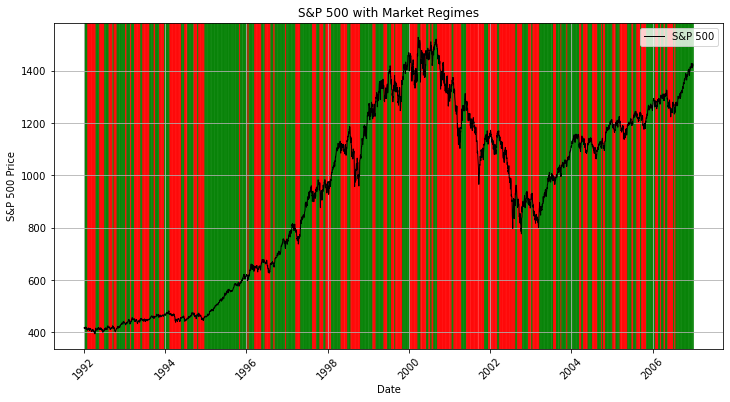

✅ Processing: 1992-07-01 to 2007-07-01
✅ Final chosen penalty: 4, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 25, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.22355827105735382}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:14:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


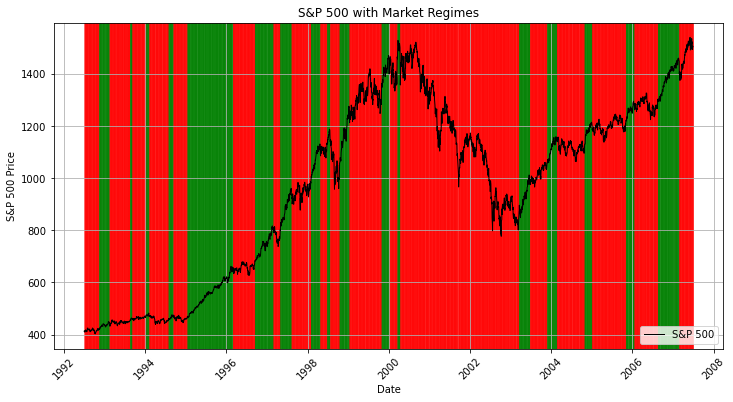

✅ Processing: 1993-01-01 to 2008-01-01
✅ Final chosen penalty: 13, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 25, 'learning_rate': 0.05, 'strat_returns': 0.2777658195216641}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:15:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


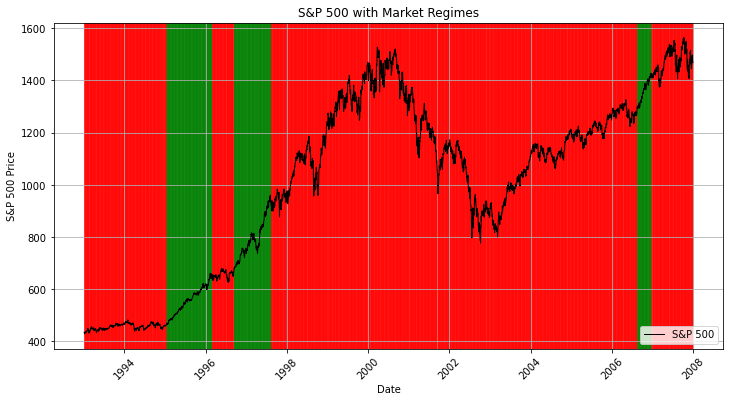

✅ Processing: 1993-07-01 to 2008-07-01
✅ Final chosen penalty: 7, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 15, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.206105064629174}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:16:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


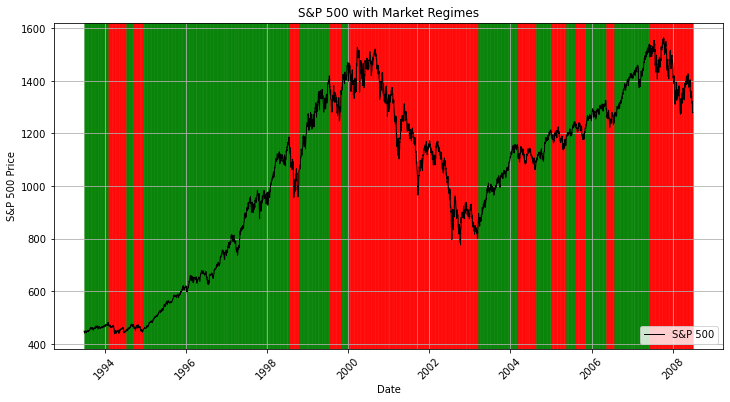

✅ Processing: 1994-01-01 to 2009-01-01
✅ Final chosen penalty: 8, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.3383135508881385}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:16:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


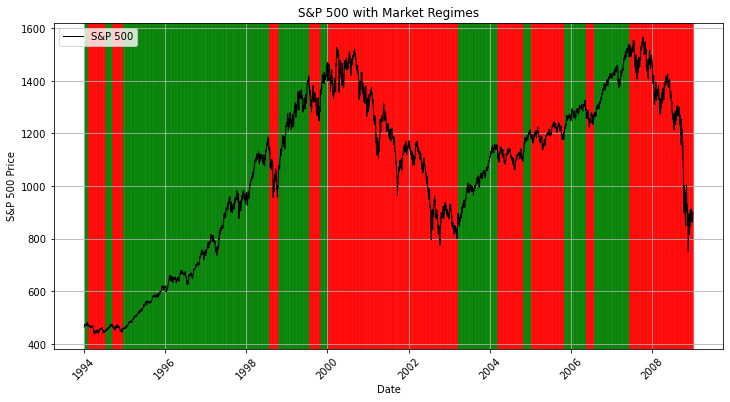

✅ Processing: 1994-07-01 to 2009-07-01
✅ Final chosen penalty: 4, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 25, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.18710163449095463}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:17:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


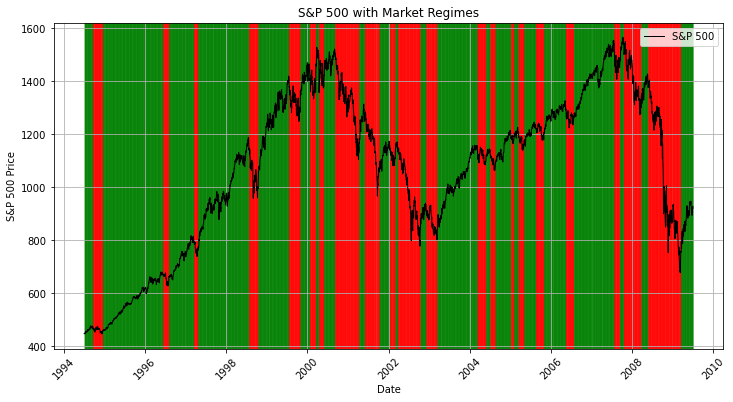

✅ Processing: 1995-01-01 to 2010-01-01
✅ Final chosen penalty: 5, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 15, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.5002927025882662}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:17:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


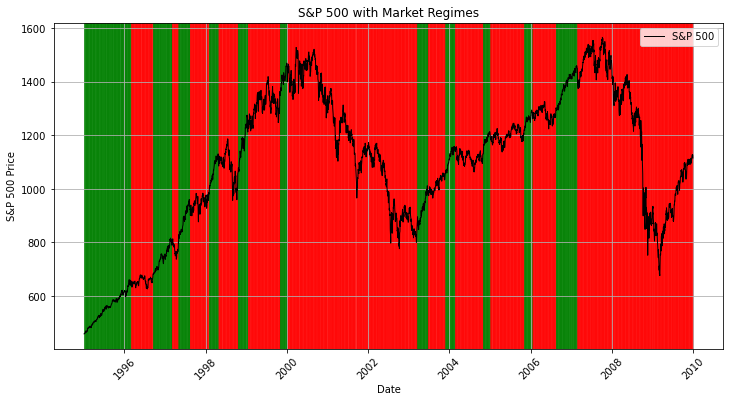

✅ Processing: 1995-07-01 to 2010-07-01
✅ Final chosen penalty: 7, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 25, 'learning_rate': 0.05, 'strat_returns': 0.25288165883919467}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:18:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


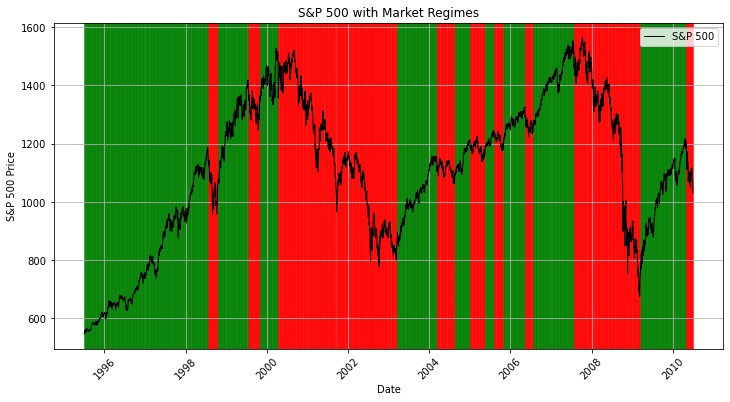

✅ Processing: 1996-01-01 to 2011-01-01
✅ Final chosen penalty: 6, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 15, 'learning_rate': 0.05, 'strat_returns': 0.26137833603654403}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:19:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


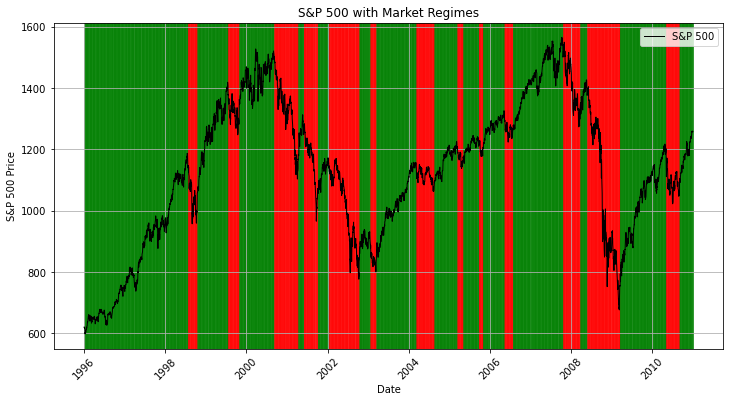

✅ Processing: 1996-07-01 to 2011-07-01
✅ Final chosen penalty: 7, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 15, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.2581391969131299}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:19:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


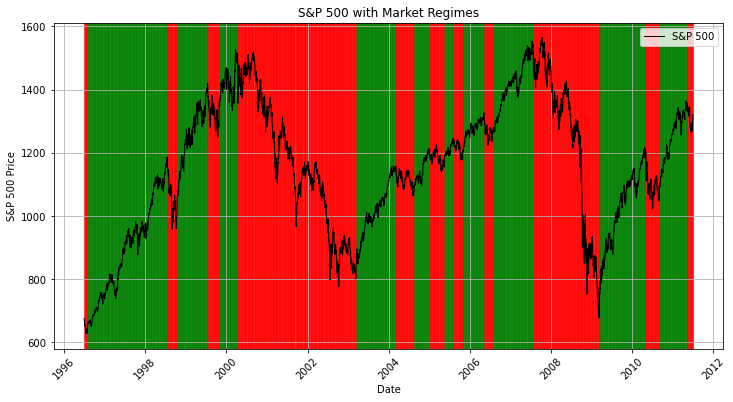

✅ Processing: 1997-01-01 to 2012-01-01
✅ Final chosen penalty: 4, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 25, 'learning_rate': 0.05, 'strat_returns': 0.35120737729840745}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:20:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


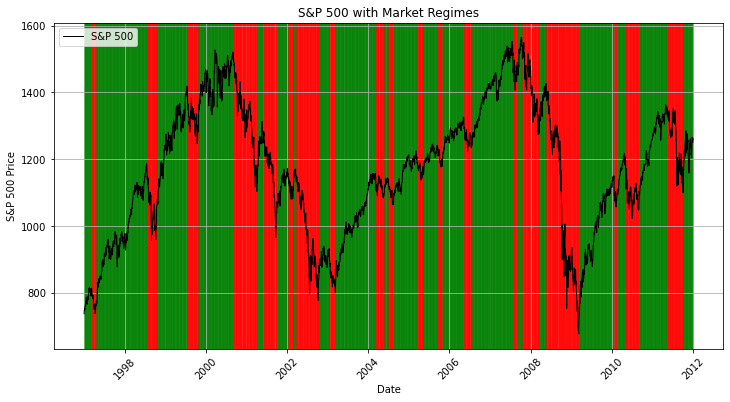

✅ Processing: 1997-07-01 to 2012-07-01
✅ Final chosen penalty: 6, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.564151293710268}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:20:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


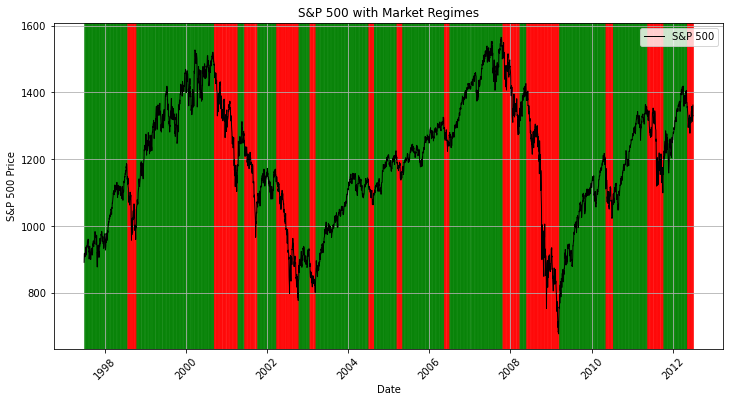

✅ Processing: 1998-01-01 to 2013-01-01
✅ Final chosen penalty: 4, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 5, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.4852446132178694}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:21:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


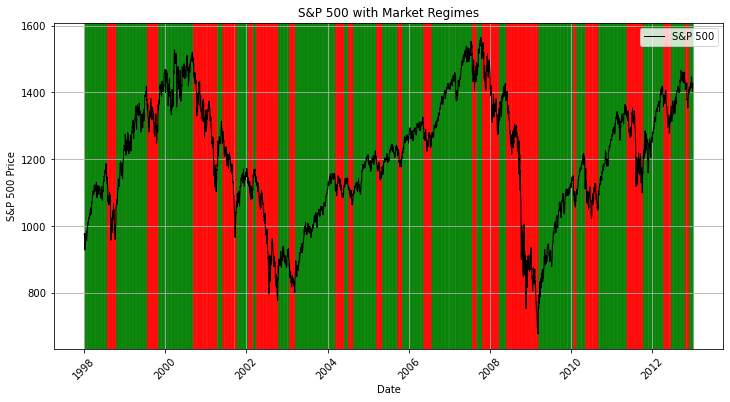

✅ Processing: 1998-07-01 to 2013-07-01
✅ Final chosen penalty: 4, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 15, 'learning_rate': 0.05, 'strat_returns': 0.8047424385041972}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:21:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


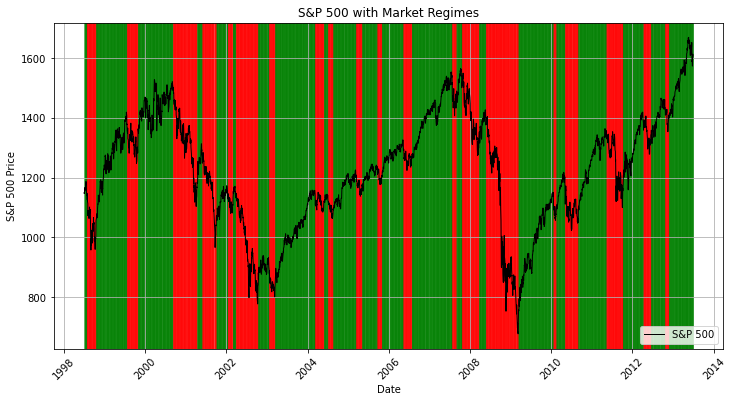

✅ Processing: 1999-01-01 to 2014-01-01
✅ Final chosen penalty: 5, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 20, 'n_estimators': 5, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.8113684292385237}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:22:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


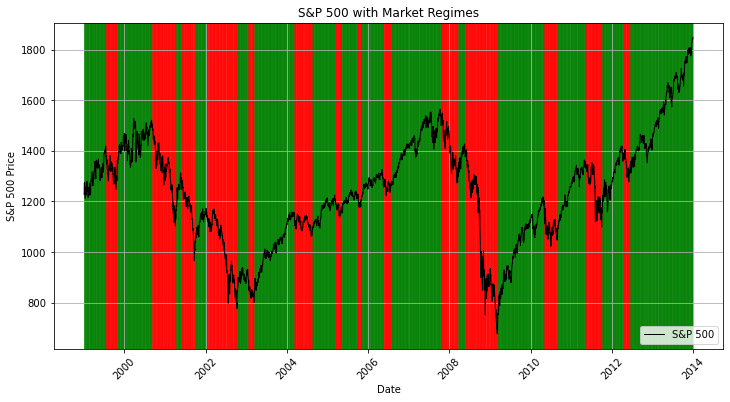

✅ Processing: 1999-07-01 to 2014-07-01
✅ Final chosen penalty: 4, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.5616026785938091}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:22:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


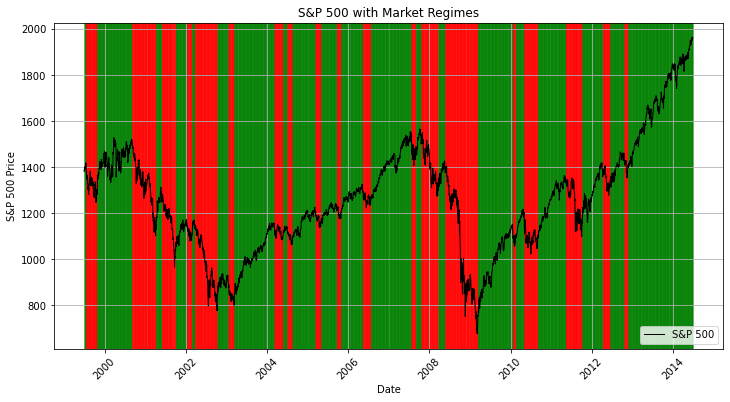

✅ Processing: 2000-01-01 to 2015-01-01
✅ Final chosen penalty: 8, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 35, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.3506580457377211}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:23:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


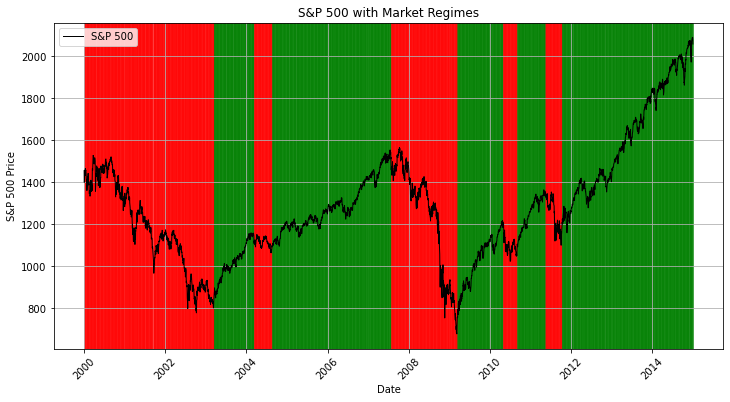

✅ Processing: 2000-07-01 to 2015-07-01
✅ Final chosen penalty: 9, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 5, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.4670660419174677}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:23:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


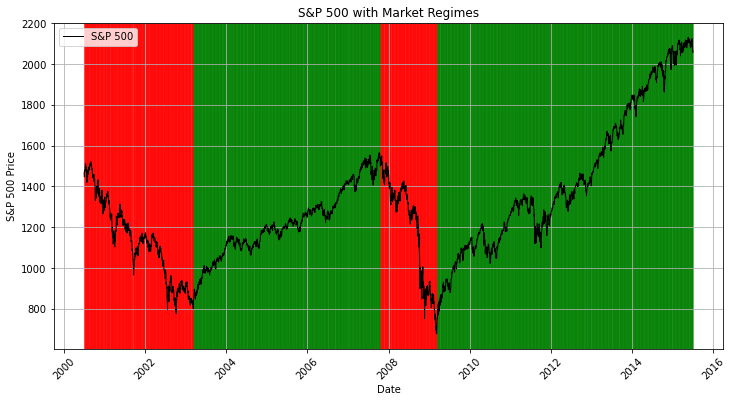

✅ Processing: 2001-01-01 to 2016-01-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.572851797065256}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:24:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


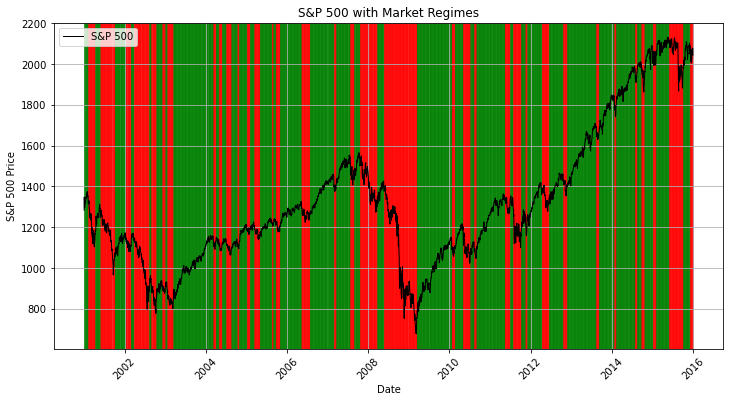

✅ Processing: 2001-07-01 to 2016-07-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.3363638591357916}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:24:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


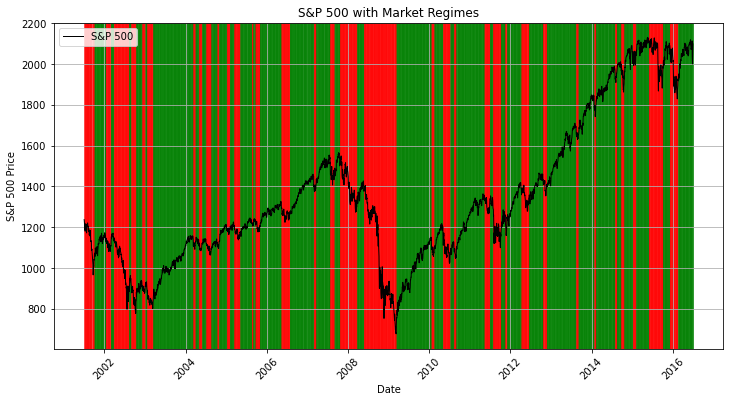

✅ Processing: 2002-01-01 to 2017-01-01
✅ Final chosen penalty: 5, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.5602670906838985}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:25:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


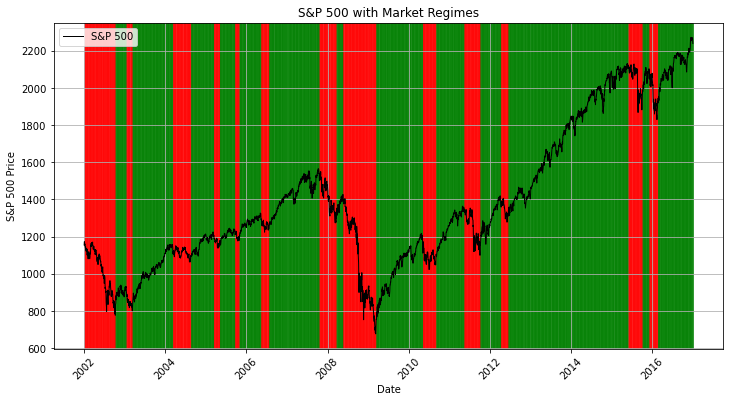

✅ Processing: 2002-07-01 to 2017-07-01
✅ Final chosen penalty: 1, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.4630219197301775}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:26:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


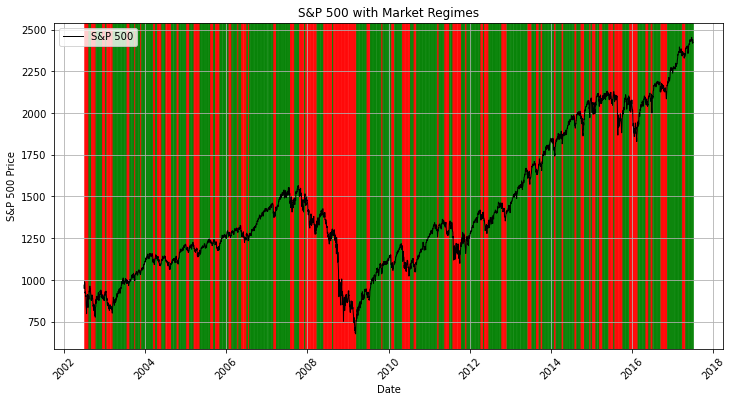

✅ Processing: 2003-01-01 to 2018-01-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.4172427991458947}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:26:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


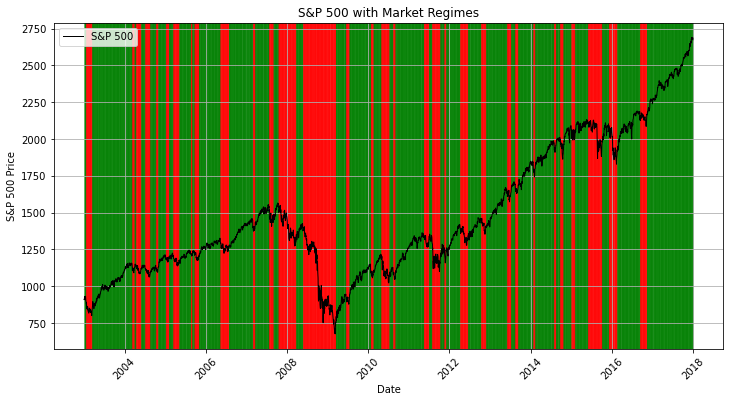

✅ Processing: 2003-07-01 to 2018-07-01
✅ Final chosen penalty: 8, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 15, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.3418262255064004}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:27:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


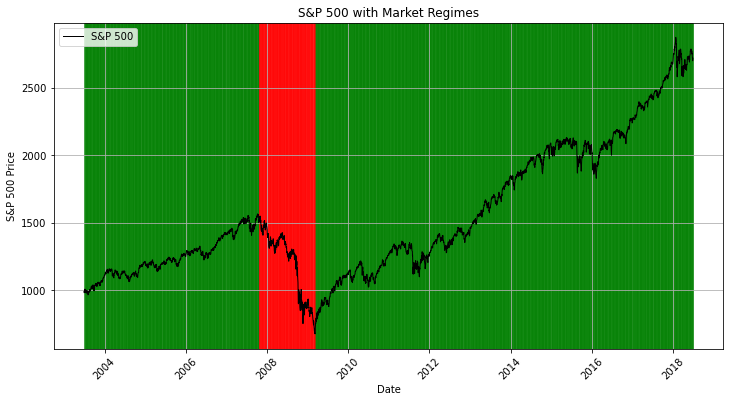

✅ Processing: 2004-01-01 to 2019-01-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.17281259638192048}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:27:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


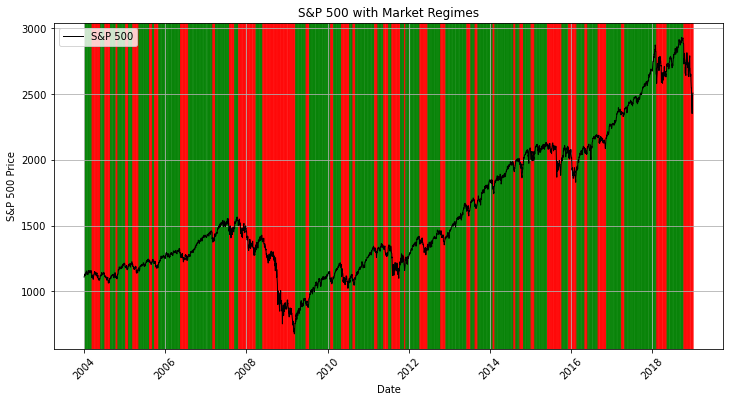

✅ Processing: 2004-07-01 to 2019-07-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.3636355309110211}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:28:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


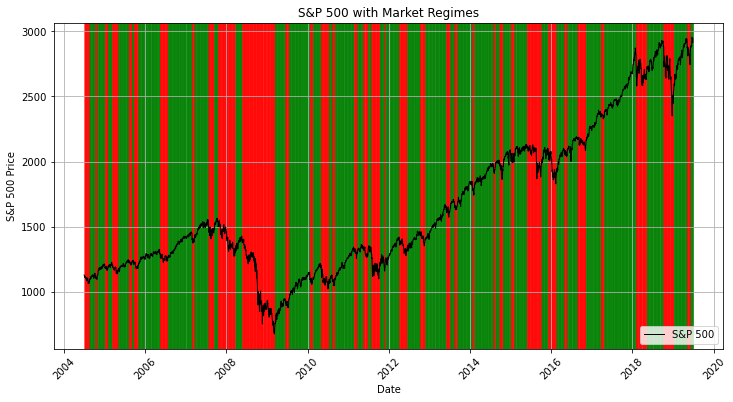

✅ Processing: 2005-01-01 to 2020-01-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.5288047102767932}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:28:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


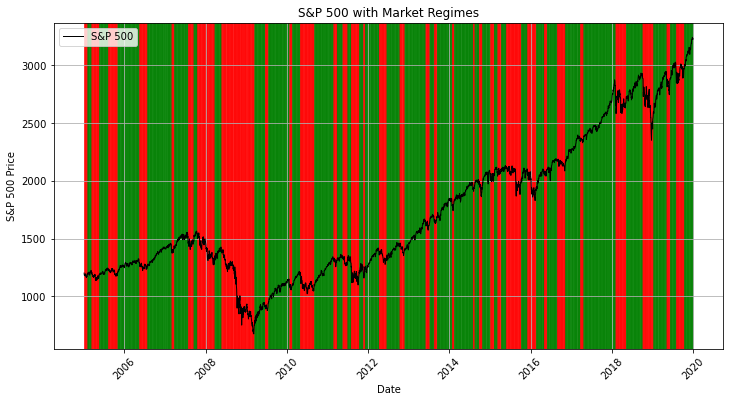

✅ Processing: 2005-07-01 to 2020-07-01
✅ Final chosen penalty: 1, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 5, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.5612949437585164}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:28:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


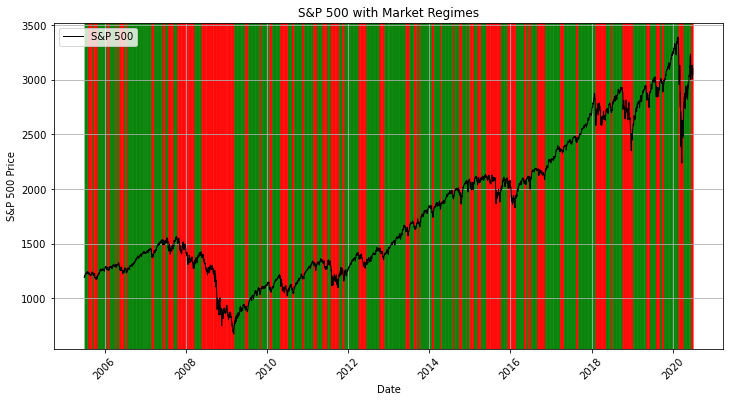

✅ Processing: 2006-01-01 to 2021-01-01
✅ Final chosen penalty: 0, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 15, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.7359947289631725}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:29:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


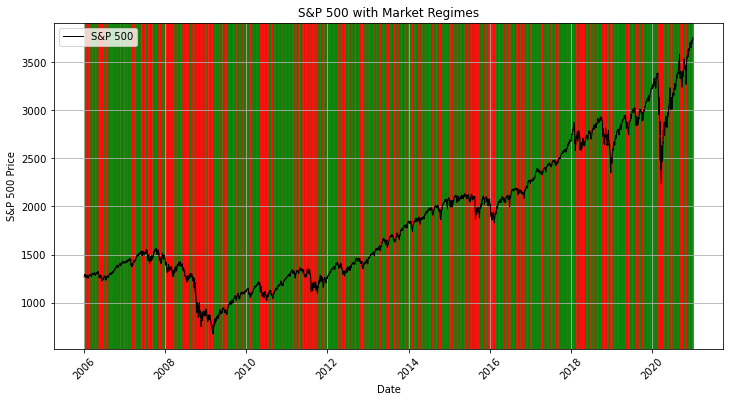

✅ Processing: 2006-07-01 to 2021-07-01
✅ Final chosen penalty: 3, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 20, 'n_estimators': 5, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.8327586895710348}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:29:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


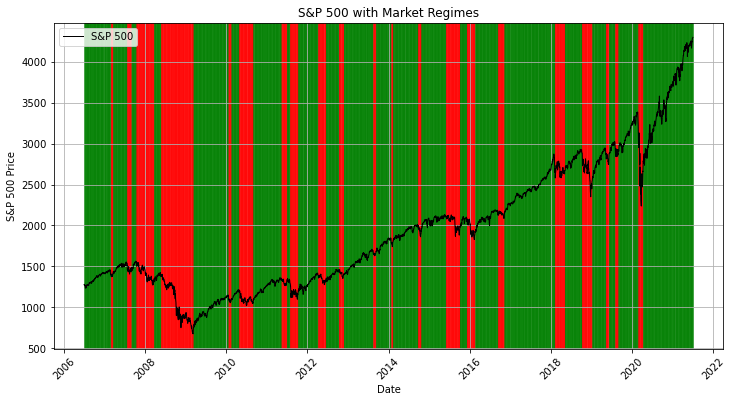

✅ Processing: 2007-01-01 to 2022-01-01
✅ Final chosen penalty: 0, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 25, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.6448656216481445}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:30:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


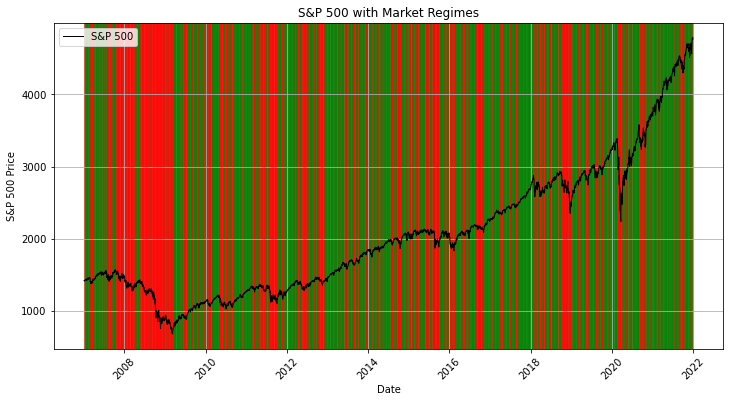

✅ Processing: 2007-07-01 to 2022-07-01
✅ Final chosen penalty: 0, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 25, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.5081213937488986}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:30:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


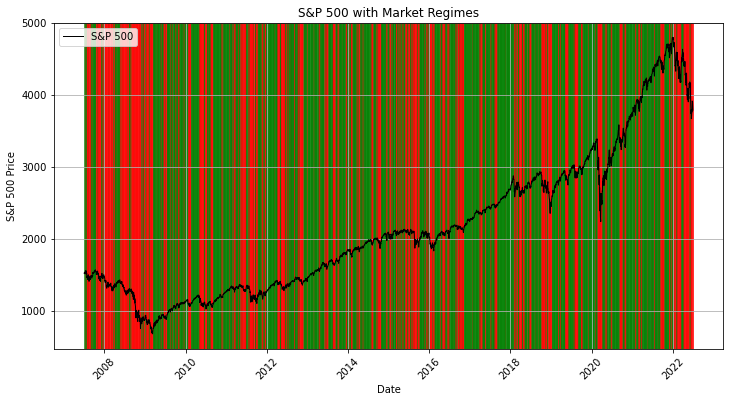

✅ Processing: 2008-01-01 to 2023-01-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 20, 'n_estimators': 15, 'learning_rate': 0.05, 'strat_returns': 0.44914544473189943}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:31:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


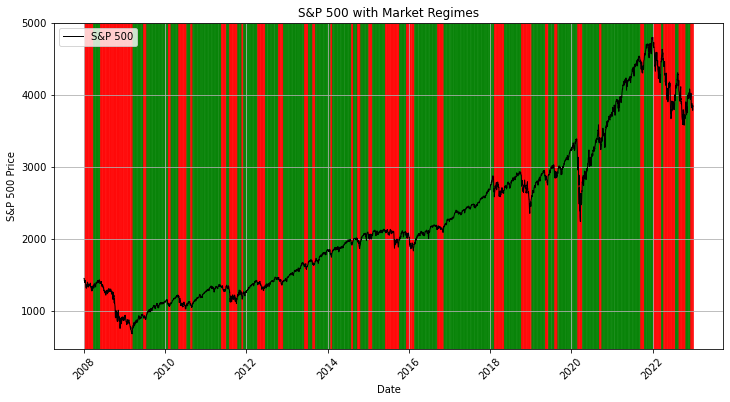

✅ Processing: 2008-07-01 to 2023-07-01
✅ Final chosen penalty: 1, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 35, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.3647320267217744}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:31:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


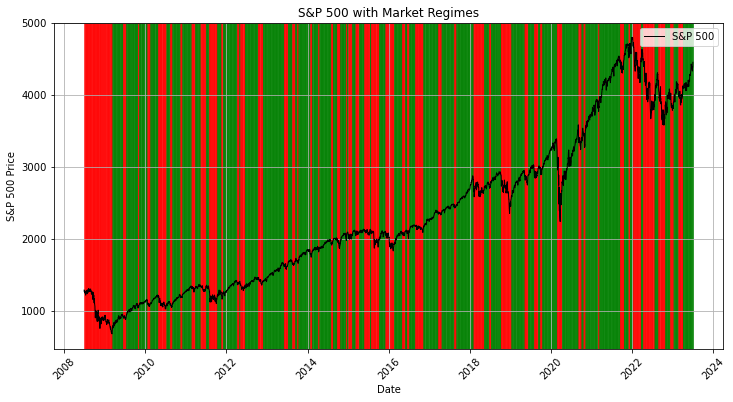

✅ Processing: 2009-01-01 to 2024-01-01
✅ Final chosen penalty: 0, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.38302640630241647}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:32:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


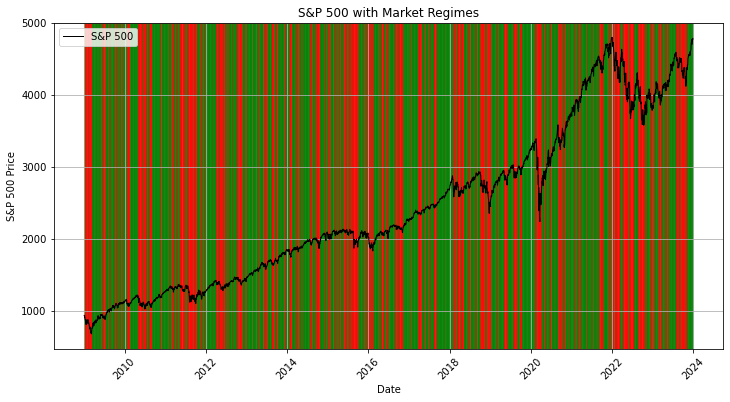

✅ Processing: 2009-07-01 to 2024-07-01
✅ Final chosen penalty: 1, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.6564679545360801}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:32:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


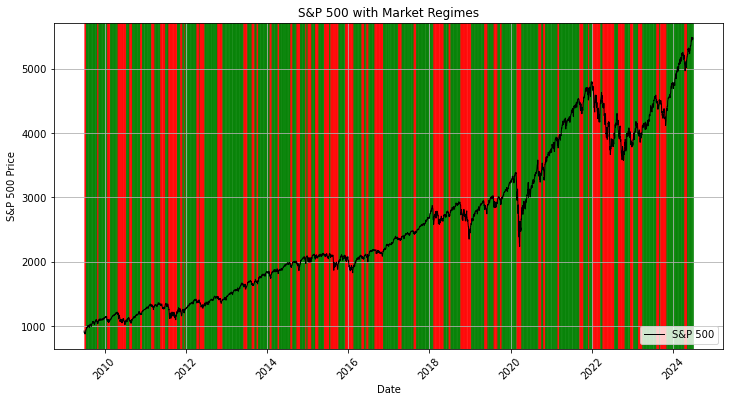

✅ Processing: 2010-01-01 to 2025-01-01
✅ Final chosen penalty: 1, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 20, 'n_estimators': 15, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.5139768099182649}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:33:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


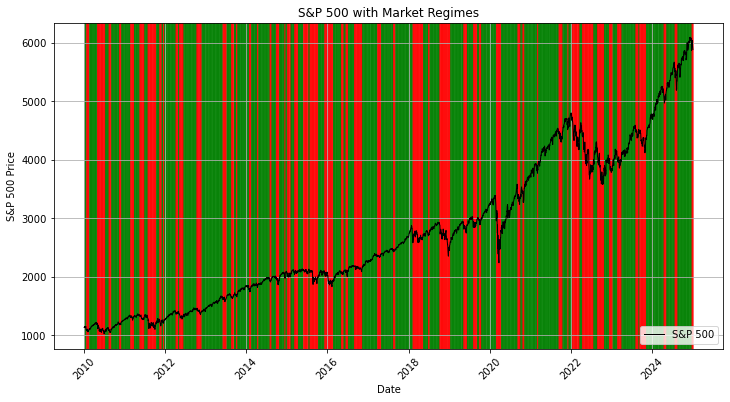

✅ Regime Forecasting Completed!


In [5]:
# 设定参数
prediction_start = "2007-01-02"
initial_train_end = (pd.to_datetime(prediction_start) - pd.DateOffset(days=1)).strftime("%Y-%m-%d")
initial_train_start = (pd.to_datetime(initial_train_end) - pd.DateOffset(years=15)).strftime("%Y-%m-%d")
prediction_end = "2025-06-10"
update_interval_months = 6
validation_years = 4

# 开始滚动训练
current_train_start = pd.to_datetime(initial_train_start)
current_train_end = pd.to_datetime(initial_train_end)
current_prediction_end = pd.to_datetime(prediction_end)
update_interval = pd.DateOffset(months=update_interval_months)

while current_train_end < current_prediction_end:
    print(f"✅ Processing: {current_train_start.date()} to {current_train_end.date()}")
    next_update_date = current_train_end + update_interval

    # 1️⃣ 训练 Jump Model (Penalized K-Means)
    df_result = train_kmeans(df_result, ASSET, feature_columns, feature_columns_xgb, 
                             current_train_start, current_train_end, validation_years=validation_years, 
                             pca=False, n_comp_kmeans = 5, next_update_date=next_update_date, 
                             pca_xgb=False, n_comp_xgb=13)
    plot_market_regime(df_result, ASSET, current_train_start, current_train_end)
    
    # 滚动窗口更新
    current_train_start += update_interval
    
    current_train_end += update_interval

print("✅ Regime Forecasting Completed!")

# 回测

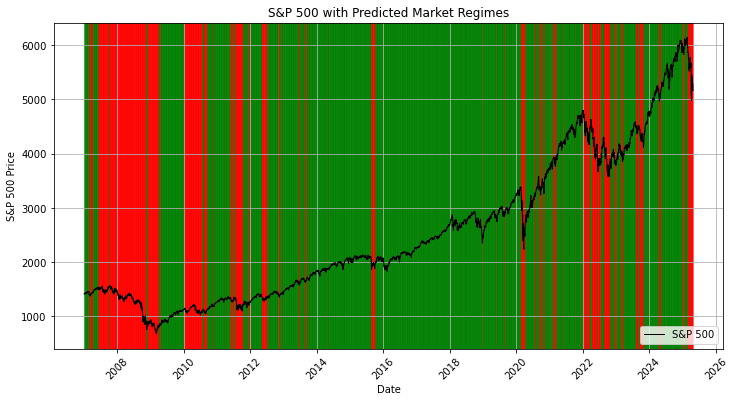

In [6]:
# 过滤数据
start = prediction_start #'2007-01-02'
df_view = df_result[df_result['DateTime'].dt.year >= 2007].reset_index()

# 创建图形
fig, ax = plt.subplots(figsize=(12, 6))

# 画出 S&P 500 走势
ax.plot(df_view['DateTime'].values, df_view[f"{ASSET}"].values, label="S&P 500", color="black", linewidth=1)

# 画出市场状态
for i in range(len(df_view) - 1):
    color = "green" if df_view["Regime_Forecast"].iloc[i] == 1 else "red"
    ax.axvspan(df_view['DateTime'].iloc[i], df_view['DateTime'].iloc[i + 1], color=color, alpha=0.3)

# 添加标题和标签
ax.set_title("S&P 500 with Predicted Market Regimes")
ax.set_xlabel("Date")
ax.set_ylabel("S&P 500 Price")
ax.legend()

# 旋转日期标签
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [7]:
# 由于代码执行状态已重置，df_view 需要重新加载
# 请上传包含 df_view 的数据文件，或者提供相关代码以重新生成 df_view
 
# 获取今天的日期
today = pd.Timestamp.today()

# 计算过去一个月的开始日期
one_month_ago = today - pd.DateOffset(months=1)

# 筛选过去一个月的数据
df_past_month = df_view[(df_view["DateTime"] >= one_month_ago) & (df_view["DateTime"] < today)].copy()

# 确保 Market_Regime_Num 这一列存在，并映射到文本标签
if "Market_Regime_Num" in df_past_month.columns:
    df_past_month["Market_Regime_Label"] = df_past_month["Regime_Forecast"].map({1: "Bullish", 0: "Bearish"})

# 只选择需要显示的列
columns_to_display = ["DateTime", f"{ASSET}", "Market_Regime_Label"]
df_past_month = df_past_month[columns_to_display]

df_past_month


,DateTime,SPX,Market_Regime_Label
4591,2025-04-02,5670.97,Bearish
4592,2025-04-03,5396.52,Bearish
4593,2025-04-04,5074.08,Bearish
4594,2025-04-07,5062.25,Bearish
4595,2025-04-08,4982.77,Bearish
4596,2025-04-09,5456.90,Bearish
4597,2025-04-10,5268.05,Bearish
4598,2025-04-11,5363.36,Bearish
4599,2025-04-14,5405.97,Bearish
4600,2025-04-15,5396.63,Bearish


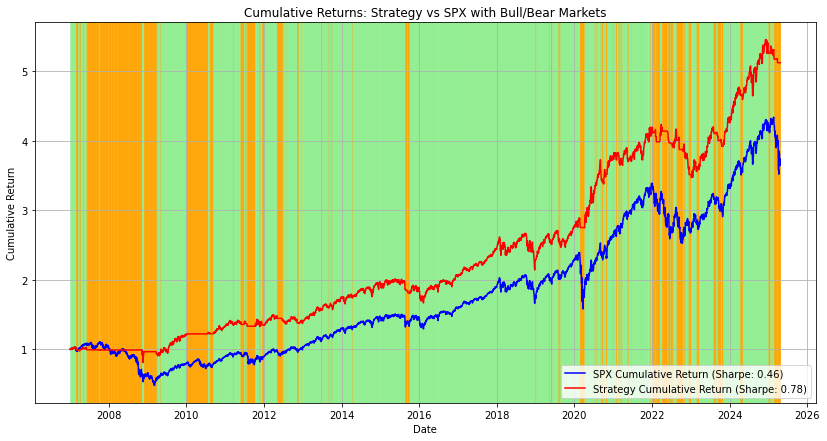

In [44]:
# 复制数据框并确保 DateTime 格式正确
df_test = df_view.copy()
df_test["DateTime"] = pd.to_datetime(df_test["DateTime"])

# 设定市场状态的基础仓位
df_test["Position"] = np.where(df_test["Regime_Forecast"] == 1, 1, 0)

# 避免未来函数问题（仓位延迟一天执行）
df_test["Position"] = df_test["Position"].shift(1)

# 计算每日收益
df_test[f"{ASSET}_Return"] = df_test[f"{ASSET}"].pct_change()
df_test["Strategy_Return"] = df_test[f"{ASSET}_Return"] * df_test["Position"]

# 计算累积收益
df_test[f"{ASSET}_Cumulative"] = (1 + df_test[f"{ASSET}_Return"]).cumprod()
df_test["Strategy_Cumulative"] = (1 + df_test["Strategy_Return"]).cumprod()

# 计算夏普比率
def sharpe_ratio(returns):
    return np.mean(returns) / np.std(returns) * np.sqrt(252)

strategy_sharpe = sharpe_ratio(df_test["Strategy_Return"].dropna())
spx_sharpe = sharpe_ratio(df_test[f"{ASSET}_Return"].dropna())

# 绘制回测结果
plt.figure(figsize=(14, 7))
plt.plot(df_test["DateTime"].values, df_test[f"{ASSET}_Cumulative"].values, label=f"{ASSET} Cumulative Return (Sharpe: {spx_sharpe:.2f})", color="blue")
plt.plot(df_test["DateTime"].values, df_test["Strategy_Cumulative"].values, label=f"Strategy Cumulative Return (Sharpe: {strategy_sharpe:.2f})", color="red")

# 画出牛市（绿色）和熊市（粉色）背景
for i in range(1, len(df_test)):
    if df_test["Regime_Forecast"].iloc[i] == 1:  # 牛市
        plt.axvspan(df_test["DateTime"].iloc[i-1], df_test["DateTime"].iloc[i], color="lightgreen", alpha=0.3)
    else:  # 熊市
        plt.axvspan(df_test["DateTime"].iloc[i-1], df_test["DateTime"].iloc[i], color="orange", alpha=0.3)

plt.title(f"Cumulative Returns: Strategy vs {ASSET} with Bull/Bear Markets")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()


# 指标

In [45]:
import numpy as np
import pandas as pd
from scipy.stats import skew


# df_cleaned = df_test[[f"{ASSET}_Return", 'Strategy_Return', f"{ASSET}_Cumulative", 'Strategy_Cumulative']].dropna()


# 计算指标函数
def sharpe_ratio(returns):
    return np.mean(returns) / np.std(returns) * np.sqrt(252) if np.std(returns) != 0 else np.nan

def max_drawdown(cumulative_returns):
    peak = np.maximum.accumulate(cumulative_returns.dropna())
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

def sortino_ratio(returns):
    downside_returns = returns[returns < 0]
    downside_std = np.std(downside_returns)
    return np.mean(returns) / downside_std * np.sqrt(252) if downside_std != 0 else np.nan

def information_coefficient(predictions, actual_returns):
    return np.corrcoef(predictions, actual_returns)[0, 1] if len(predictions) > 1 else np.nan

def rank_information_coefficient(predictions, actual_returns):
    return np.corrcoef(pd.Series(predictions).rank(), pd.Series(actual_returns).rank())[0, 1] if len(predictions) > 1 else np.nan

def skewness(returns):
    return skew(returns, nan_policy='omit')


# # 复制数据并清理 NaN
# df_cleaned = df_test.dropna()

# # 计算指标
# # 计算指标
# metrics = {
#     "Metric": ["Mean Return", "Standard Deviation", "Sharpe Ratio", "Sortino Ratio", "Max Drawdown", "Skewness", "IC", "Rank IC"],
#     "SPX": [
#         np.mean(df_cleaned[f"{ASSET}_Return"]),
#         np.std(df_cleaned[f"{ASSET}_Return"]),
#         sharpe_ratio(df_cleaned[f"{ASSET}_Return"]),
#         sortino_ratio(df_cleaned[f"{ASSET}_Return"]),
#         max_drawdown(df_cleaned[f"{ASSET}_Cumulative"]),
#         skewness(df_cleaned[f"{ASSET}_Return"]),
#         '-',  # SPX 无法计算 IC
#         '-'   # SPX 无法计算 Rank IC
#     ],
#     "Strategy": [
#         np.mean(df_cleaned["Strategy_Return"]),
#         np.std(df_cleaned["Strategy_Return"]),
#         sharpe_ratio(df_cleaned["Strategy_Return"]),
#         sortino_ratio(df_cleaned["Strategy_Return"]),
#         max_drawdown(df_cleaned["Strategy_Cumulative"]),
#         skewness(df_cleaned["Strategy_Return"]),
#         information_coefficient(df_cleaned["Position"], df_cleaned[f"{ASSET}_Return"]),
#         rank_information_coefficient(df_cleaned["Position"], df_cleaned[f"{ASSET}_Return"])
#     ]
# }

# # 转换为 DataFrame 并展示
# metrics_df = pd.DataFrame(metrics)
# metrics_df


In [46]:
def rolling_sharpe_ratio(returns, window=252*5, step=21):
    sharpe_ratios = []
    cumrets = []
    dates = []

    for start in range(0, len(returns) - window + 1, step):
        end = start + window
        window_returns = returns[start:end]

        # Cumulative return
        cumulative_return = np.prod(1 + window_returns) - 1
        annualized_return = (1 + cumulative_return) ** (252 / window) - 1

        # Annualized volatility
        annualized_vol = np.std(window_returns) * np.sqrt(252)

        sharpe = annualized_return / annualized_vol if annualized_vol != 0 else np.nan

        # Append results
        sharpe_ratios.append(sharpe)
        cumrets.append(cumulative_return)
        dates.append(df_test["DateTime"].iloc[end - 1])

    return pd.DataFrame({
        "Date": dates,
        "Sharpe Ratio": sharpe_ratios,
        "Cumulative Return": cumrets
    })

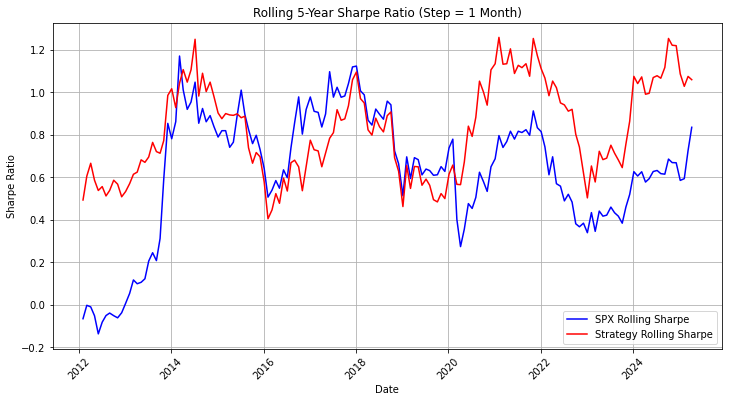

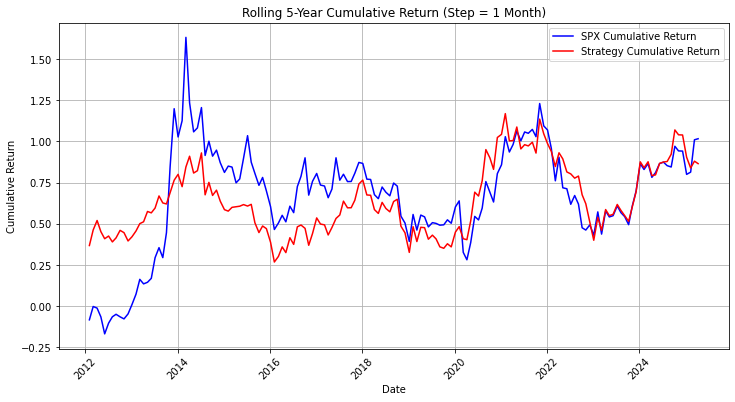

In [47]:
spx_sharpe_df = rolling_sharpe_ratio(df_test[f"{ASSET}_Return"].values)
strategy_sharpe_df = rolling_sharpe_ratio(df_test["Strategy_Return"].values)

# 合并
rolling_sharpe_df = pd.merge(
    spx_sharpe_df, strategy_sharpe_df,
    on="Date",
    suffixes=(f"_{ASSET}", "_Strategy")
)

plt.figure(figsize=(12, 6))
plt.plot(rolling_sharpe_df["Date"].values, rolling_sharpe_df[f"Sharpe Ratio_{ASSET}"].values, label=f"{ASSET} Rolling Sharpe", color="blue")
plt.plot(rolling_sharpe_df["Date"].values, rolling_sharpe_df["Sharpe Ratio_Strategy"].values, label="Strategy Rolling Sharpe", color="red")
plt.title("Rolling 5-Year Sharpe Ratio (Step = 1 Month)")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(rolling_sharpe_df["Date"].values, rolling_sharpe_df[f"Cumulative Return_{ASSET}"].values, label=f"{ASSET} Cumulative Return", color="blue")
plt.plot(rolling_sharpe_df["Date"].values, rolling_sharpe_df["Cumulative Return_Strategy"].values, label="Strategy Cumulative Return", color="red")
plt.title("Rolling 5-Year Cumulative Return (Step = 1 Month)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


In [22]:
df_test['SPX_Position'] = df_test['Position']
df_test[['DateTime', 'SPX_Position', 'SPX_Return']].to_excel('/Users/charlesxiong/Desktop/IBKR_algo/ode/data/SPX/SPX_positions.xlsx')

<ipython-input-22-a6931db224ac>:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  df_test[['DateTime', 'SPX_Position', 'SPX_Return']].to_excel('/Users/charlesxiong/Desktop/IBKR_algo/ode/data/SPX/SPX_positions.xlsx')


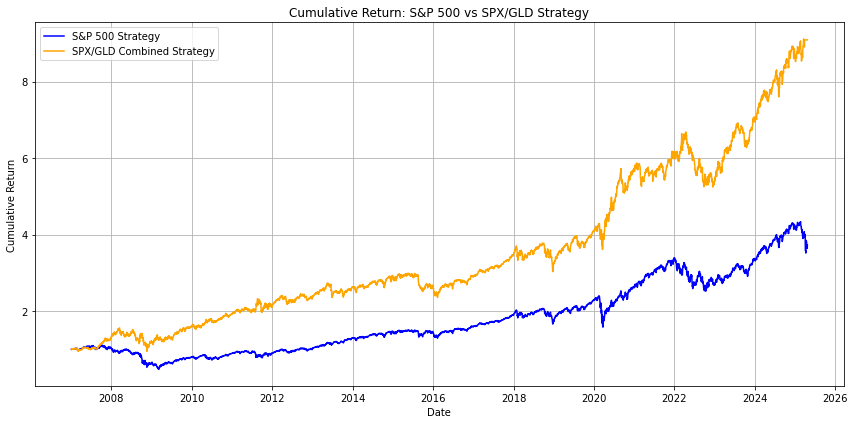

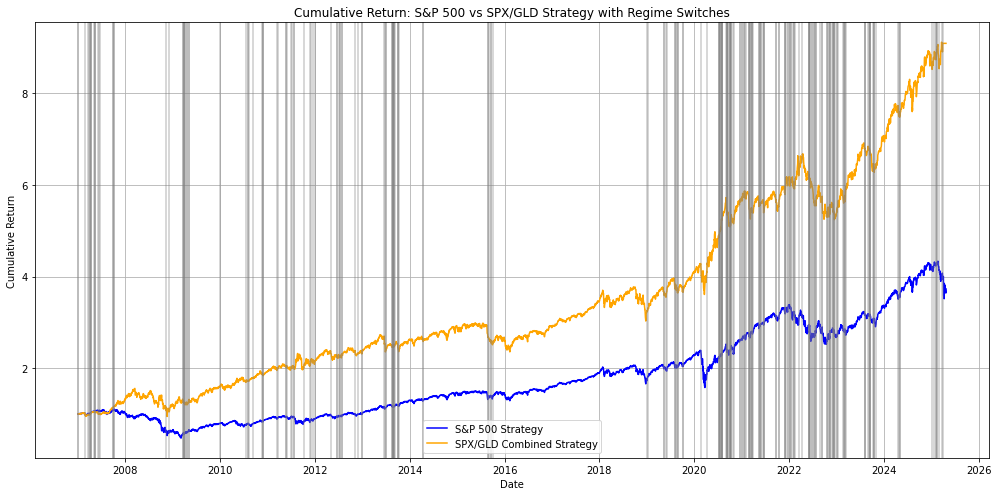

In [37]:
import yfinance as yf
import pandas as pd

# Step 1: Download GLD data from Yahoo Finance
df_test = pd.read_excel('/Users/charlesxiong/Desktop/IBKR_algo/ode/data/SPX/SPX_positions.xlsx')
gld = pd.read_excel('/Users/charlesxiong/Desktop/IBKR_algo/ode/data/GLD.xlsx')

# Step 2: Prepare df_test DataFrame
# Ensure df_test is already loaded with 'DateTime', 'SPX_Position', and 'SPX_Return' columns

# Step 3: Merge GLD data with df_test
df_merged = pd.merge(df_test[['DateTime', 'SPX_Position', 'SPX_Return']], gld[['DateTime', 'GLD_Close']], how='left')

# Step 4: Calculate Combined Returns
# Calculate GLD daily returns
df_merged['GLD_Return'] = df_merged['GLD_Close'].pct_change()

# Determine portfolio returns based on SPX_Position
df_merged['Portfolio_Return'] = df_merged.apply(
    lambda row: row['SPX_Return'] if row['SPX_Position'] == 1 else row['GLD_Return'],
    axis=1
)

# Display the resulting DataFrame
df_merged[['SPX_Position', 'SPX_Return', 'GLD_Return', 'Portfolio_Return']]

# Step 5: 计算累计收益（Cumulative Returns）
df_merged['SPX_CumRet'] = (1 + df_merged['SPX_Return']).cumprod()
df_merged['Portf_CumRet'] = (1 + df_merged['Portfolio_Return']).cumprod()

# Step 6: 画图
plt.figure(figsize=(12, 6))
plt.plot(df_merged['DateTime'].values, df_merged['SPX_CumRet'].values, label='S&P 500 Strategy', color='blue')
plt.plot(df_merged['DateTime'].values, df_merged['Portf_CumRet'].values, label='SPX/GLD Combined Strategy', color='orange')
plt.title('Cumulative Return: S&P 500 vs SPX/GLD Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 找出 SPX_Position 切换的日期（从1变0或从0变1）
df_merged['Position_Change'] = df_merged['SPX_Position'].ne(df_merged['SPX_Position'].shift())
switch_dates = df_merged.loc[df_merged['Position_Change'], 'DateTime']

# 画图
plt.figure(figsize=(14, 7))
plt.plot(df_merged['DateTime'].values, df_merged['SPX_CumRet'].values, label='S&P 500 Strategy', color='blue')
plt.plot(df_merged['DateTime'].values, df_merged['Portf_CumRet'].values, label='SPX/GLD Combined Strategy', color='orange')

# 添加 regime 切换点竖线
for switch_date in switch_dates:
    plt.axvline(switch_date, color='grey', alpha=0.4)

plt.title('Cumulative Return: S&P 500 vs SPX/GLD Strategy with Regime Switches')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
df_merged["0/1 Strategy_Return"] = df_merged['SPX_Return'] * df_merged["SPX_Position"]
df_merged["0/1 Strategy_Cumulative"] = (1 + df_merged["0/1 Strategy_Return"]).cumprod()
df_merged = df_merged.dropna(subset = ['SPX_Return', 'SPX_CumRet', 'Portfolio_Return', 'Portf_CumRet'])

In [39]:
metrics = {
    "Metric": ["Annual Return", "Annual Standard Deviation", "Sharpe Ratio", "Sortino Ratio", "Max Drawdown", "Skewness", "IC"],
    "SPX": [
        (1 + np.mean(df_merged['SPX_Return']))**252 - 1,
        np.std(df_merged['SPX_Return']) * np.sqrt(252),
        sharpe_ratio(df_merged['SPX_Return']),
        sortino_ratio(df_merged['SPX_Return']),
        max_drawdown(df_merged['SPX_CumRet']),
        skewness(df_merged['SPX_Return']),
        '-',  # SPX 无法计算 IC
#         '-'   # SPX 无法计算 Rank IC
    ],
    "SPX/GLD Strategy": [
        (1 + np.mean(df_merged['Portfolio_Return']))**252 - 1,
        np.std(df_merged['Portfolio_Return']) * np.sqrt(252),
        sharpe_ratio(df_merged["Portfolio_Return"]),
        sortino_ratio(df_merged["Portfolio_Return"]),
        max_drawdown(df_merged["Portf_CumRet"]),
        skewness(df_merged["Portfolio_Return"]),
        '-',  # SPX 无法计算 IC
#         '-'   # SPX 无法计算 Rank IC
    ],
    "SPX 0/1 Strategy": [
       (1 + np.mean(df_merged['0/1 Strategy_Return']))**252 - 1,
        np.std(df_merged['0/1 Strategy_Return']) * np.sqrt(252),
        sharpe_ratio(df_merged["0/1 Strategy_Return"]),
        sortino_ratio(df_merged["0/1 Strategy_Return"]),
        max_drawdown(df_merged["0/1 Strategy_Cumulative"]),
        skewness(df_merged["0/1 Strategy_Return"]),
        information_coefficient(df_merged["SPX_Position"], df_merged['SPX_Return']),
#         rank_information_coefficient(df_merged["SPX_Position"], df_merged['SPX_Return'])
    ]
}

# 转换为 DataFrame 并展示
metrics_df = pd.DataFrame(metrics)
metrics_df


,Metric,SPX,SPX/GLD Strategy,SPX 0/1 Strategy
0,Annual Return,0.096723,0.144703,0.101956
1,Annual Standard Deviation,0.200944,0.169217,0.123878
2,Sharpe Ratio,0.459548,0.798864,0.783883
3,Sortino Ratio,0.559485,1.018426,0.846699
4,Max Drawdown,-0.567754,-0.392653,-0.214564
5,Skewness,-0.200223,-0.148311,-0.362517
6,IC,-,-,0.020906


In [26]:
np.sum(df_merged['Position_Change']==True)/18

14.0

In [27]:
df_merged

# 将 Position_Change == True 作为新的持仓开始，累加组编号
df_merged['Group'] = df_merged['Position_Change'].cumsum()

# 只统计每组中连续 False 的数量
group_lengths = df_merged[df_merged['Position_Change'] == False].groupby('Group').size()

# 计算平均长度
average_holding_period = group_lengths.mean()

average_holding_period

25.904761904761905